Compilation Progress
--------------------
	(1) Translating the circuit template into a networkx graph representation...
		...finished.
	(2) Preprocessing edge transmission operations...
		...finished.
	(3) Parsing the model equations into a compute graph...
		...finished.
	Model compilation was finished.
Simulation Progress
-------------------
	 (1) Generating the network run function...
	 (2) Processing output variables...
		...finished.
	 (3) Running the simulation...
		...finished after 0.6071761986240745s.


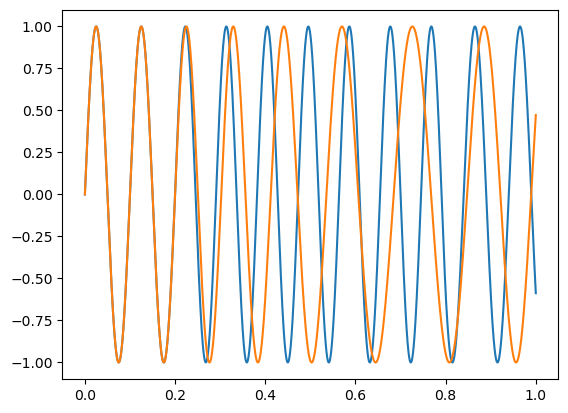

In [1]:
from pyrates import integrate
import numpy as np

# define simulation time and input start and stop
T = 1.0
step_size = 1e-4
start = 0.2
stop = 0.8

# extrinsic input definition
steps = int(np.round(T/step_size))
I_ext = np.zeros((steps,))
I_ext[int(start/step_size):int(stop/step_size)] = 1.0

# perform simulation
results = integrate("model_templates.oscillators.kuramoto.kmo_2coupled", step_size=step_size, simulation_time=T,
                    outputs={'theta_1': 'p1/phase_op/theta', 'theta_2': 'p2/phase_op/theta'},
                    inputs={'p1/phase_op/s_ext': I_ext}, clear=True)

# plot resulting phases
import matplotlib.pyplot as plt
plt.plot(np.sin(results*2*np.pi))
plt.show()

Compilation Progress
--------------------
	(1) Translating the circuit template into a networkx graph representation...
		...finished.
	(2) Preprocessing edge transmission operations...
		...finished.
	(3) Parsing the model equations into a compute graph...
		...finished.
	Model compilation was finished.
Simulation Progress
-------------------
	 (1) Generating the network run function...
	 (2) Processing output variables...
		...finished.
	 (3) Running the simulation...


/home/hice1/mchen439/scratch/miniconda3/envs/MATH8803/lib/python3.11/site-packages/pyrates/backend/computegraph.py:89: ComplexWarning: Casting complex values to real discards the imaginary part
  self._value = np.asarray(v, dtype=self.dtype)
/home/hice1/mchen439/scratch/miniconda3/envs/MATH8803/lib/python3.11/site-packages/scipy/integrate/_ivp/ivp.py:616: UserWarning: The following arguments have no effect for a chosen solver: `float_precision`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)


		...finished after 68.29358649533242s.


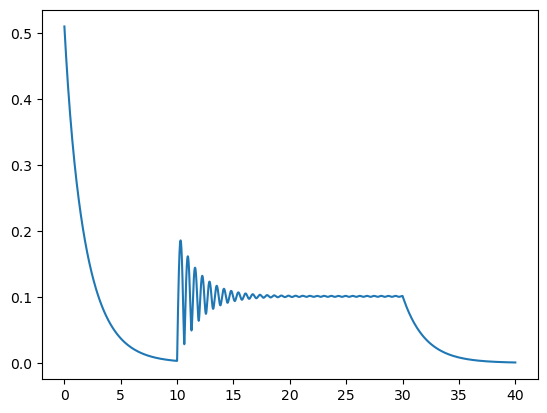

In [2]:
# define simulation time and input start and stop
T = 40.0
step_size = 1e-4
start = 10.0
stop = 30.0

# extrinsic input definition
steps = int(np.round(T/step_size))
I_ext = np.zeros((steps,))
I_ext[int(start/step_size):int(stop/step_size)] = 2.0

# perform simulation
results = integrate("model_templates.oscillators.kuramoto.kmo_mf", step_size=step_size, simulation_time=T,
                    outputs={'z': 'p/kmo_op/z'}, inputs={'p/kmo_op/s_ext': I_ext}, clear=True, solver='scipy',
                    float_precision='complex64')

# plot resulting coherence dynamics
import matplotlib.pyplot as plt
plt.plot(np.abs(results))
plt.show()

In [1]:
from pyrates.frontend import CircuitTemplate
jrc = CircuitTemplate.from_yaml("model_templates.neural_mass_models.jansenrit.JRC")

In [2]:
results = jrc.run(simulation_time=2.0,
                  step_size=1e-4,
                  sampling_step_size=1e-3,
                  outputs={'V_pce': 'pc/rpo_e_in/v',
                           'V_pci': 'pc/rpo_i/v'},
                  backend='default',
                  solver='scipy')

Compilation Progress
--------------------
	(1) Translating the circuit template into a networkx graph representation...
		...finished.
	(2) Preprocessing edge transmission operations...
		...finished.
	(3) Parsing the model equations into a compute graph...
		...finished.
	Model compilation was finished.
Simulation Progress
-------------------
	 (1) Generating the network run function...
	 (2) Processing output variables...
		...finished.
	 (3) Running the simulation...
		...finished after 11.077257202006876s.


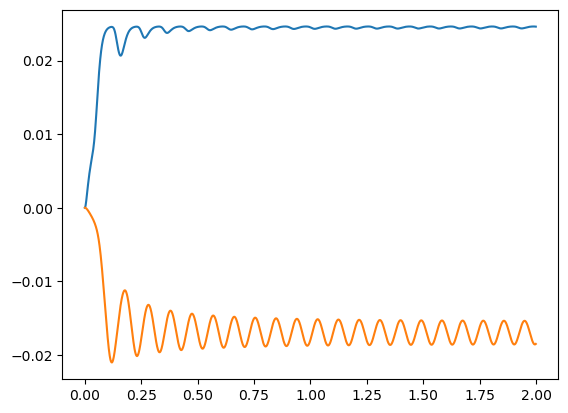

In [3]:
import matplotlib.pyplot as plt
plt.plot(results)
plt.show()

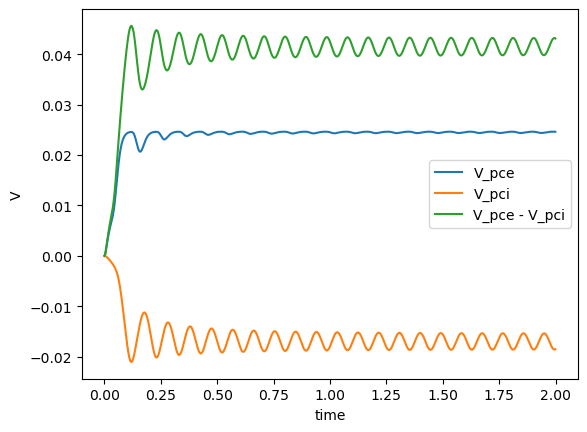

In [7]:
v_pc = results['V_pce'] - results['V_pci']
plt.plot(results['V_pce'])
plt.plot(results['V_pci'])
plt.plot(v_pc)
plt.legend(['V_pce', 'V_pci', 'V_pce - V_pci'])
plt.ylabel('V')
plt.xlabel('time')

plt.show()